In [5]:
import re
import datetime
from pandas import DataFrame, Series
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [6]:
%matplotlib inline

### Parsing - DataFrame에 자료를 적절하게 넣기위해서 적절한 모양으로 Parsing 해주어야 한다.

In [19]:
#주어진 카카오톡 파일을 개발자가 원하는 형태로 파싱 한다.

def parsing_txt(input_txt,output_txt):
    with open(input_txt,'r') as m_data:
        with open(output_txt,'w') as data:

            for a in m_data.readlines():
                #--------------- 가 있는 부분을 기준으로 해서,
                if a.startswith('---------------'):
                    date_time = re.sub('[-]', '', a) #---------------가 있는 부분을 모두 공백으로 바꾼다.
                    date_time = re.sub('[ㄱ-힣]', ' ', date_time)# 위에서 걸러진 문장들 중에서, 문자가 있으면 모두 공백으로 바꾼다.
                    date_time = date_time.split()#각각 시게열 정보를 split 메쏘드를 이용해서 각각 년,월,일 로 나눈다.
                    date_time = datetime.date(int(date_time[0]), int(date_time[1]), int(date_time[2])) # datetime 객체로 만들어 준다.
                    continue
                #빈 공간은 예외 처리 한다.
                elif len(a) <= 1:
                    continue

                #kwon123.txt 라는 파일에, 아래와 같은 포맷으로 저장한다.
                data.writelines(date_time.strftime('%Y-%m-%d]') + a)
                data.writelines("\n")
             
    with open(output_txt,'r') as m_data:
        cnt=0
        cnt2=0
        list2=[]

    #아래의 for문은 output_txt에 있는 정보들을 보다 쉽게 DataFrame에 넣기 위해서, 편집하기 쉽도록 수정하는 부분이다.
        for a in m_data.readlines():
            for x in a:
                if x==']' and a.index(']',cnt) != -1:

                     # ']' 되어 있는 부분은 ']#'으로 바꾸어 줘서 '#'을 기준으로 DataFrame을 만들 수 있도록 한다.
                    result = a.replace("]", "]#")
                    cnt2+=1

                    if cnt2 == 3:
                        list2.append(result)
                        break
                    cnt+=1
                else:
                    cnt+=1
            cnt=0
            cnt2=0

    with open(output_txt,'w') as m_data:
        m_data.writelines(list2)
        m_data.writelines("\n")

In [20]:
parsing_txt("KakaoTalk_20160406_0200_23_973_group.txt","result.txt") #개발자가 원하는 형태로 만들어 준다.

### 데이터 프레임 생성

* 윈도우의 경우에 ANSI 인코딩 때문에, 위의 과정을 한 후에, 인코딩을 UTF-8로 수정해주어야 한다.

In [27]:
names = ['date','name','time','contents']
data = pd.read_table('result.txt',sep="#",header=None,names=names)

### 데이터 프레임 내에서의 date에 해당 하는 값들을 세팅 해준다. 개발자의 편의에 맞춰 파싱해 준다.

In [28]:
from dateutil.parser import parse

cnt=0
cnt1=0


for a in data['date']:
    
    if cnt ==0:
        data['date'][cnt1] = parse(a.strip("\ufeff]")) #결과값에 알 수 없는 버그 값이 있어서 예외로 처리하였다.
        cnt1=cnt1+1
    else:
        data['date'][cnt1] = parse(a.strip("]"))
        cnt1=cnt1+1


In [29]:
data #정리 된 결과 값

,date,name,time,contents
0,2016-03-02 00:00:00,[남현석],[오후 1:16],자취하면 예비군훈련갈 군복 갖고와야돼나요
1,2016-03-02 00:00:00,[박병섭],[오후 1:16],이응
2,2016-03-02 00:00:00,[남현석],[오후 1:17],감사합니다
3,2016-03-02 00:00:00,[송다솔],[오후 1:56],사진
4,2016-03-02 00:00:00,[송다솔],[오후 1:56],사통사물함에 책이 되게많은데
5,2016-03-02 00:00:00,[송다솔],[오후 1:56],혹 주인없는책있나요??
6,2016-03-02 00:00:00,[송민건],[오후 2:00],주인없는책을 어케알어 주인있는책을 물어바야지 ㅌㅋㅋㅋ
7,2016-03-02 00:00:00,[김지성],[오후 2:00],사스가
8,2016-03-02 00:00:00,[최장환],[오후 2:00],멍청멍청
9,2016-03-02 00:00:00,[박병섭],[오후 2:04],없으신분 손~~


In [32]:
data['name'].value_counts()[:20]

[송민건]     75
[김오영]     48
[권태형]     48
[황태구]     43
[홍세화]     41
[박병섭]     40
[박세웅]     40
[김지성]     26
[이주현]     25
[홍창경]     23
[어수영]     22
[임무현]     18
[릉]       13
[신수정]     13
[문ㅊ나웅]    12
[송다솔]     11
[범구]      11
[희주]      10
[현수]       9
[이건희]      7
Name: name, dtype: int64

In [99]:
data['name'].count()

570

In [95]:
k = data['name'].value_counts()[:20]

DataFrame(k)

,name
[송민건],75
[김오영],48
[권태형],48
[황태구],43
[홍세화],41
[박병섭],40
[박세웅],40
[김지성],26
[이주현],25
[홍창경],23


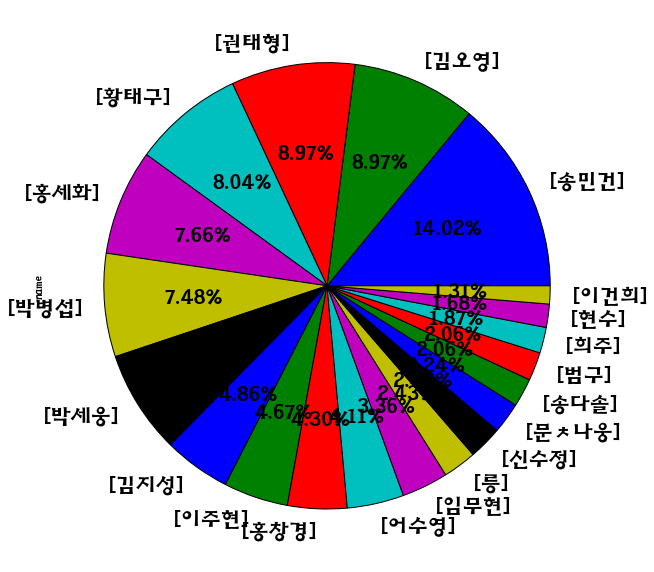

In [33]:
matplotlib.rc('font', family='HYsanB')  # 한글 폰트 설정
data['name'].value_counts()[:20].plot(kind = 'pie',figsize=(10,10),fontsize=20,autopct='%.2f%%')

#Pie 그래프 형태로 나타낸 모습


In [34]:
modified_data = data.set_index('date')
modified_data

#기존 데이터 프레임의 date를 index로 설정한다.

,name,time,contents
date,,,
2016-03-02,[남현석],[오후 1:16],자취하면 예비군훈련갈 군복 갖고와야돼나요
2016-03-02,[박병섭],[오후 1:16],이응
2016-03-02,[남현석],[오후 1:17],감사합니다
2016-03-02,[송다솔],[오후 1:56],사진
2016-03-02,[송다솔],[오후 1:56],사통사물함에 책이 되게많은데
2016-03-02,[송다솔],[오후 1:56],혹 주인없는책있나요??
2016-03-02,[송민건],[오후 2:00],주인없는책을 어케알어 주인있는책을 물어바야지 ㅌㅋㅋㅋ
2016-03-02,[김지성],[오후 2:00],사스가
2016-03-02,[최장환],[오후 2:00],멍청멍청


In [117]:
result = []

#data에 contents 부분을 하나씩 불러 오는데, 'b' 에는 띄어 쓰기를 기준으로 해서, result 리스트에 각 한 띄어쓰기된 단어 별로 추가 한다.
for a in data['contents']:
    for b in a.split():
        result.append(b)

a = Series(result) #해당 리스트를 Series로 만든다.
a = DataFrame(a, columns=['word']) #해당 리스트를 DataFrame으로 만든다.
a

#이 상태에서 a를 출력 하면, 띄어쓰기 기준으로 단어가 몇개 나와있는지에 대해서 쭉 리스팅 된 상태로 출력이 된다.

,word
0,자취하면
1,예비군훈련갈
2,군복
3,갖고와야돼나요
4,이응
5,감사합니다
6,사진
7,사통사물함에
8,책이
9,되게많은데


In [118]:
k = a['word'].value_counts()[:20]
#위의 a에 대해서, 가장 많이 나온 단어를 기준으로 상위 20위 까지를 추려낸다.

#DataFrame을 만들어서, 표를 출력해 준다.
k = DataFrame(k)
k.columns=['Count']
k.index.name=['MSG']
k

,Count
[MSG],
사진,32
(이모티콘),20
오늘,10
ㅋㅋ,10
ㅋㅋㅋㅋ,9
23기,8
안녕하세요,7
23대,7
ㅋㅋㅋㅋㅋ,6


In [119]:
#위의 DataFrame의 문제점은, 쓸 때 없는 'ㅋ', 'ㅎ', 'ㄴ'  처럼 쓸데 없는 것들도 포함되어있다는 것이다.
#그것에 대한 필터링을 하고, 글자 수 조정도 할 수 있도록 한다.

result1 = []

for k in a['word']:
    if 'ㅋ' in k or 'ㅎ' in k or 'ㅠ' in k or '사진' in k or '(' in k or len(k) <4:
        pass
    else:
        result1.append(k)

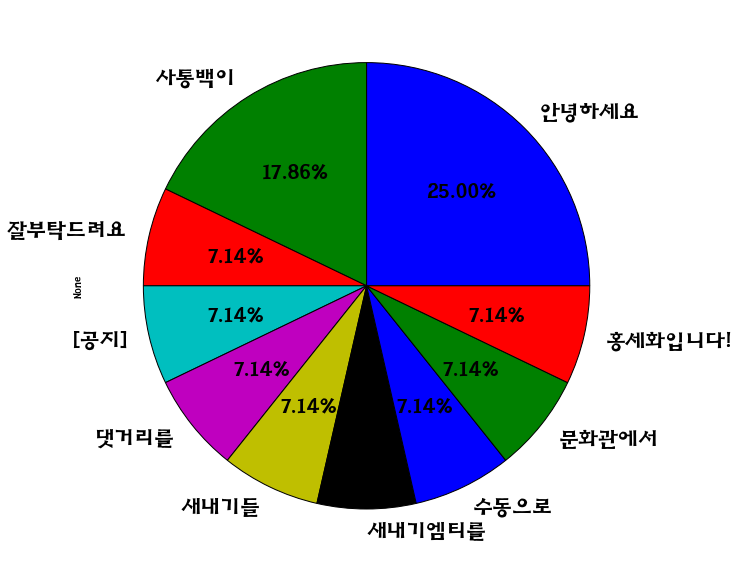

In [120]:
result1 = Series(result1)
result1 = result1.value_counts()[:10]
result1.plot(kind = 'pie',figsize=(10,10),fontsize=20,autopct='%.2f%%')

어떤 인물에 대해서, 각 월 별 총 메세지 개수 파악 - 각 인물이 각 월 마다, 메세지를 얼마나 보냈는지에 대해서 알 수 있다.

In [81]:
def Message_Cnt_Month(name,month):

    result = {}

    for a in range(1,32):    
        try:
            result[str(month) + "월 "+ str(a) +"일"]=data['name'].ix[data.name==name]['2016-'+ str(month) +'-'+str(a)].count()
        except:
            result[str(month) + "월 "+ str(a) +"일"]=0
            
    result = Series(result)
    return result



for a in data['name'].value_counts()[0:3].index:
    result = Message_Cnt_Month(a,3)
    print("{}님의 3월달 메세지 보낸 갯수 현황 입니다.".format(a))
    print(result.sort_values(ascending=False))
    print("\n")

3월 10일    0
3월 11일    0
3월 12일    0
3월 13일    0
3월 14일    0
3월 15일    0
3월 16일    0
3월 17일    0
3월 18일    0
3월 19일    0
3월 1일     0
3월 20일    0
3월 21일    0
3월 22일    0
3월 23일    0
3월 24일    0
3월 25일    0
3월 26일    0
3월 27일    0
3월 28일    0
3월 29일    0
3월 2일     0
3월 30일    0
3월 31일    0
3월 3일     0
3월 4일     0
3월 5일     0
3월 6일     0
3월 7일     0
3월 8일     0
3월 9일     0
dtype: int64
[송민건]님의 3월달 메세지 보낸 갯수 현황 입니다.
3월 9일     0
3월 23일    0
3월 11일    0
3월 12일    0
3월 13일    0
3월 14일    0
3월 15일    0
3월 16일    0
3월 17일    0
3월 18일    0
3월 19일    0
3월 1일     0
3월 20일    0
3월 21일    0
3월 22일    0
3월 24일    0
3월 8일     0
3월 25일    0
3월 26일    0
3월 27일    0
3월 28일    0
3월 29일    0
3월 2일     0
3월 30일    0
3월 31일    0
3월 3일     0
3월 4일     0
3월 5일     0
3월 6일     0
3월 7일     0
3월 10일    0
dtype: int64


3월 10일    0
3월 11일    0
3월 12일    0
3월 13일    0
3월 14일    0
3월 15일    0
3월 16일    0
3월 17일    0
3월 18일    0
3월 19일    0
3월 1일     0
3월 20일    0
3월 21일    0
3월 22일    0
3월 23일    0
3월 24일    0
3월 25일

In [82]:
def Message_Cnt_Month(name,month):

    result = {}

    for a in range(1,32):    
        try:
            result[str(month) + "월 "+ str(a) +"일"]=modified_data['name'].ix[modified_data.name==name]['2016-'+ str(month) +'-'+str(a)].count()
        except:
            result[str(month) + "월 "+ str(a) +"일"]=0
            
    result = Series(result)
    return result



for a in data['name'].value_counts()[0:3].index:
    result = Message_Cnt_Month(a,3)
    print("{}님의 3월달 메세지 보낸 갯수 현황 입니다.".format(a))
    print(result.sort_values(ascending=False))
    print("\n")

[송민건]님의 3월달 메세지 보낸 갯수 현황 입니다.
3월 22일    15
3월 3일     14
3월 15일     9
3월 18일     8
3월 29일     7
3월 23일     6
3월 6일      3
3월 30일     3
3월 31일     2
3월 28일     2
3월 9일      0
3월 16일     0
3월 17일     0
3월 14일     0
3월 1일      0
3월 13일     0
3월 12일     0
3월 11일     0
3월 19일     0
3월 24일     0
3월 20일     0
3월 21일     0
3월 8일      0
3월 25일     0
3월 26일     0
3월 27일     0
3월 2일      0
3월 4일      0
3월 5일      0
3월 7일      0
3월 10일     0
dtype: int64


[김오영]님의 3월달 메세지 보낸 갯수 현황 입니다.
3월 25일    10
3월 29일     9
3월 21일     8
3월 23일     5
3월 4일      4
3월 22일     3
3월 15일     3
3월 20일     2
3월 10일     2
3월 16일     0
3월 14일     0
3월 18일     0
3월 19일     0
3월 1일      0
3월 13일     0
3월 12일     0
3월 11일     0
3월 17일     0
3월 9일      0
3월 8일      0
3월 26일     0
3월 27일     0
3월 28일     0
3월 2일      0
3월 30일     0
3월 31일     0
3월 3일      0
3월 5일      0
3월 6일      0
3월 7일      0
3월 24일     0
dtype: int64


[권태형]님의 3월달 메세지 보낸 갯수 현황 입니다.
3월 29일    9
3월 8일     7
3월 15일    5
3월 25일    4
3월 18일    4
3월 21일    4
3월

In [83]:
import datetime

import re

temp = []
date_time = []

result = []

for a in data['time']:
    temp.append(re.sub('[]]', '', a))
    
for a in temp:
    date_time.append(re.sub('[[]','',a))
    

for a in date_time:
    a = a.split()
    if a[0] =='오전':
        a[1] = a[1].split(':')
        
        if a[1][0] == '12':
            t=datetime.time(int('00'),int(a[1][1]))
        else:
            t=datetime.time(int(a[1][0]),int(a[1][1]))
        
    elif a[0] == '오후':
        a[1] = a[1].split(':')
        if a[1][0] == '12':
            t=datetime.time(int(a[1][0]),int(a[1][1]))
        else:
            t=datetime.time(int(a[1][0])+12,int(a[1][1]))
    result.append(t)

In [84]:
import datetime

time1 = []
for a in result:
    time1.append(str(a).split(':'))

    
    
date1 = []
for a in data['date']:
    date1.append(str(a).split(' '))

date2 = []
for a in date1:
    date2.append(str(a[0]))
    
date3 = []
for a in date2:
    date3.append(a.split('-'))

    
m_date = []

for a in range(len(result)):
     m_date.append(datetime.datetime(int(date3[a][0]),int(date3[a][1]),int(date3[a][2]),int(time1[a][0]),int(time1[a][1])))

m_date = Series(m_date)
m_date = DataFrame(m_date)

In [85]:
m_data = data

m_data['m_date'] = m_date

m_data = m_data.set_index('m_date')

del m_data['date']

m_data

,name,time,contents
m_date,,,
2016-03-02 13:16:00,[남현석],[오후 1:16],자취하면 예비군훈련갈 군복 갖고와야돼나요
2016-03-02 13:16:00,[박병섭],[오후 1:16],이응
2016-03-02 13:17:00,[남현석],[오후 1:17],감사합니다
2016-03-02 13:56:00,[송다솔],[오후 1:56],사진
2016-03-02 13:56:00,[송다솔],[오후 1:56],사통사물함에 책이 되게많은데
2016-03-02 13:56:00,[송다솔],[오후 1:56],혹 주인없는책있나요??
2016-03-02 14:00:00,[송민건],[오후 2:00],주인없는책을 어케알어 주인있는책을 물어바야지 ㅌㅋㅋㅋ
2016-03-02 14:00:00,[김지성],[오후 2:00],사스가
2016-03-02 14:00:00,[최장환],[오후 2:00],멍청멍청


In [89]:
m_data['2016-03-25']

,name,time,contents
m_date,,,
2016-03-25 11:44:00,[김오영],[오전 11:44],(이모티콘)안녕하세요 사통백이 23대총무 김오영입니당!! ㅎㅎ 오늘 새내기엠틴데...
2016-03-25 11:44:00,[김오영],[오전 11:44],(이모티콘)감사합니당
2016-03-25 12:56:00,[김지성],[오후 12:56],어디야오영바
2016-03-25 13:11:00,[김오영],[오후 1:11],저요?
2016-03-25 13:11:00,[김오영],[오후 1:11],(이모티콘)풍방이요
2016-03-25 13:11:00,[김오영],[오후 1:11],ㅋㅋㅋㅋㅋ
2016-03-25 13:15:00,[김지성],[오후 1:15],현금드림
2016-03-25 13:48:00,[송민건],[오후 1:48],집현실 한달에 최대 몇번 빌릴수 있음?
2016-03-25 13:52:00,[김오영],[오후 1:52],한이름으로 최대 4번이래요~


In [90]:
a = m_data['2016-3-25']

a = a.set_index('name')
a = DataFrame(a['contents'])

a.ix['[김오영]']

,contents
name,
[김오영],(이모티콘)안녕하세요 사통백이 23대총무 김오영입니당!! ㅎㅎ 오늘 새내기엠틴데...
[김오영],(이모티콘)감사합니당
[김오영],저요?
[김오영],(이모티콘)풍방이요
[김오영],ㅋㅋㅋㅋㅋ
[김오영],한이름으로 최대 4번이래요~
[김오영],저요??
[김오영],세화오빠가 수업중이여서요
[김오영],아마 정문에서 출발할꺼예요


In [92]:
a = m_data['2016-3-29']

a = a.set_index('name')
a = DataFrame(a['contents'])

a.ix['[권태형]']

,contents
name,
[권태형],나할래ㅋㅋ
[권태형],아 4명
[권태형],팀 이야?? ㅋㅋ
[권태형],글쎄
[권태형],내가4명은못모을거같은데ㅋㅋ
[권태형],주변에노는사람이없어서ㅠ
[권태형],응ㅋㅋ
[권태형],땡스ㅋㅋ
[권태형],왠시디롬?


In [93]:
a = m_data['2016-3-3']

a = a.set_index('name')
a = DataFrame(a['contents'])

a.ix['[송민건]']

,contents
name,
[송민건],ㅋㅋㅋㅋ
[송민건],박병섭 ㄱㄱ
[송민건],10이 다 ㅂㅅ인듯
[송민건],저게4학년인데
[송민건],사진
[송민건],컴파일러 들으려고 했지만 1교시
[송민건],ㅋㅋㅋㅋ
[송민건],패스하면 시험안봐도됨?
[송민건],모의토익은?


In [111]:
from collections import OrderedDict

count = {}

count = OrderedDict(count)

for a in range(2,32):
    count[str(a)+'일'] = m_data['2016-3-'+str(a)]['name'].count()
    
count = Series(count)

count = DataFrame(count)
count.index.name = 'Day'
count.columns =['Count']
count = count.sort_values(by='Count',ascending=True)

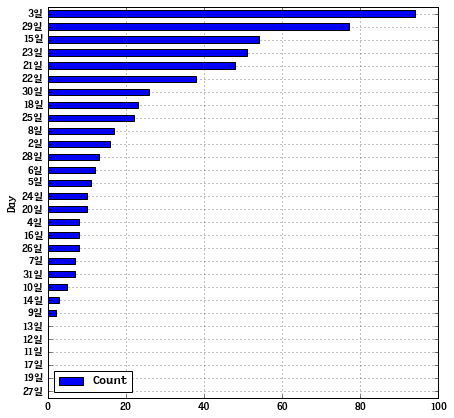

In [112]:
count.plot(kind = 'barh',figsize=(7,7),fontsize=10,grid=True)

In [115]:
 m_data['2016-3-21']

,name,time,contents
m_date,,,
2016-03-21 20:35:00,[권태형],[오후 8:35],오늘 치배뽑기 다뽑혔니? ㅋㅋ
2016-03-21 20:35:00,[송다솔],[오후 8:35],지금 회의중입니당
2016-03-21 20:36:00,[김오영],[오후 8:36],(이모티콘)
2016-03-21 20:37:00,[신수정],[오후 8:37],(이모티콘)
2016-03-21 20:37:00,[홍세화],[오후 8:37],(이모티콘)
2016-03-21 20:43:00,[권태형],[오후 8:43],ㅋㅋㅋㅋ고생들해써ㅋ좋은결과있겠지ㅋㅋ
2016-03-21 20:52:00,[박세웅],[오후 8:52],ㅋㅋㅋ
2016-03-21 20:53:00,[박세웅],[오후 8:53],아무도없니??
2016-03-21 20:53:00,[김오영],[오후 8:53],발표중이용
